<a href="https://colab.research.google.com/github/Priangshu-18/Dog-vs-Cat-image-classification/blob/main/Dog_vs_Cat_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [5]:
# configure the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# Importing the kaggle dataset
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:13<00:00, 56.7MB/s]
100% 812M/812M [00:13<00:00, 61.0MB/s]


In [8]:
# Extracting the zip file
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [9]:
# Extracting the zip file
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
import os
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images:', file_count)

Number of images: 25000


Printing the name of the images

In [12]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.4051.jpg', 'cat.2581.jpg', 'dog.1256.jpg', 'cat.1347.jpg', 'dog.6917.jpg', 'dog.7145.jpg', 'cat.7393.jpg', 'dog.9406.jpg', 'dog.8504.jpg', 'dog.4575.jpg', 'cat.3467.jpg', 'dog.3300.jpg', 'dog.9158.jpg', 'dog.8339.jpg', 'dog.6408.jpg', 'dog.11751.jpg', 'dog.7979.jpg', 'dog.8553.jpg', 'dog.2135.jpg', 'dog.6279.jpg', 'cat.310.jpg', 'cat.3554.jpg', 'cat.11056.jpg', 'dog.1488.jpg', 'cat.4469.jpg', 'dog.11361.jpg', 'dog.2252.jpg', 'cat.8866.jpg', 'dog.10387.jpg', 'dog.9394.jpg', 'cat.2487.jpg', 'dog.2441.jpg', 'dog.9400.jpg', 'dog.1631.jpg', 'cat.625.jpg', 'cat.9905.jpg', 'dog.12430.jpg', 'dog.10265.jpg', 'dog.8249.jpg', 'cat.9860.jpg', 'cat.5882.jpg', 'dog.1111.jpg', 'cat.3537.jpg', 'cat.619.jpg', 'cat.6493.jpg', 'cat.1249.jpg', 'dog.9954.jpg', 'dog.10250.jpg', 'dog.10857.jpg', 'cat.9013.jpg', 'cat.10883.jpg', 'dog.4451.jpg', 'dog.6147.jpg', 'dog.8626.jpg', 'dog.9516.jpg', 'dog.2363.jpg', 'cat.2365.jpg', 'cat.1641.jpg', 'cat.9238.jpg', 'dog.5609.jpg', 'dog.10193.jpg', 'dog.2868.jpg', 

Importing the dependencies

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mping
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images

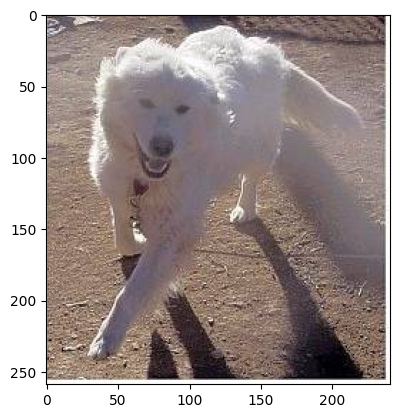

In [15]:
img = mping.imread('/content/train/dog.6917.jpg')
imgplot = plt.imshow(img)
plt.show()

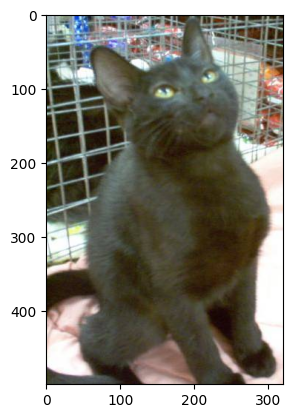

In [16]:
img = mping.imread('/content/train/cat.2581.jpg')
imgplot = plt.imshow(img)
plt.show()

Counting the number of dog and cat images

In [19]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print('Number of dog iamges:', dog_count)
print('Number of cat iamges:', cat_count)

Number of dog iamges: 12500
Number of cat iamges: 12500


Resizing the images

In [20]:
os.mkdir('/content/image resized')

In [22]:
original_folder = '/content/train/'
resized_img_folder = '/content/image resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  new_img_path = resized_img_folder+filename
  img.save(new_img_path)

Displaying resized image

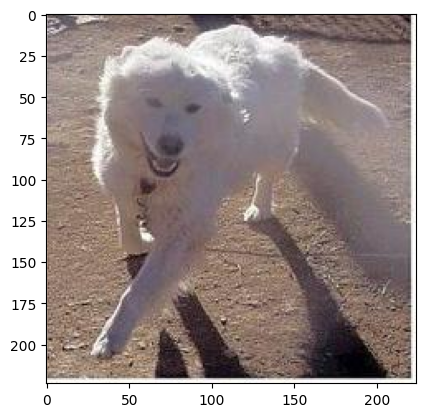

In [23]:
img = mping.imread('/content/image resized/dog.6917.jpg')
imgplot = plt.imshow(img)
plt.show()

Creating labels for dogs and cats

Dog -> 1

Cat -> 0

In [24]:
filenames = os.listdir('/content/image resized/')

labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [25]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 0, 1]
2000


Counting the images of dogs and cats in resized images

In [26]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 980 1020]


The distribution is almost equal so no need to do any changes

In [27]:
import cv2
import glob

In [33]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [34]:
print(dog_cat_images)

[[[[ 62 112 134]
   [ 62 112 134]
   [ 62 112 134]
   ...
   [ 61 116 137]
   [ 60 115 136]
   [ 60 115 136]]

  [[ 65 115 137]
   [ 63 113 135]
   [ 62 112 134]
   ...
   [ 62 117 138]
   [ 61 116 137]
   [ 61 116 137]]

  [[ 69 119 141]
   [ 67 117 139]
   [ 64 114 136]
   ...
   [ 64 119 140]
   [ 64 119 140]
   [ 64 119 140]]

  ...

  [[100 139 154]
   [ 95 134 149]
   [ 98 134 150]
   ...
   [111 156 177]
   [113 158 179]
   [114 159 180]]

  [[ 99 135 151]
   [ 93 129 145]
   [ 96 130 146]
   ...
   [109 154 175]
   [111 156 177]
   [113 158 179]]

  [[ 95 131 147]
   [ 90 126 142]
   [ 92 126 142]
   ...
   [106 151 172]
   [109 154 175]
   [111 156 177]]]


 [[[186 180 157]
   [210 204 181]
   [195 188 168]
   ...
   [ 15  32  45]
   [ 17  34  47]
   [ 13  30  43]]

  [[177 171 148]
   [201 195 172]
   [190 183 163]
   ...
   [  7  24  33]
   [  6  21  30]
   [  0  16  25]]

  [[170 164 141]
   [193 187 164]
   [183 176 156]
   ...
   [ 51  63  67]
   [ 54  65  69]
   [ 54  66

In [35]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [36]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> Training images

400 --> Test images

In [41]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [42]:
print(X_train_scaled)

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1. 

Building the neural network

In [53]:
import tensorflow as tf
import tensorflow_hub as hub

In [47]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)

In [52]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7cd0554ed210> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)